In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_obj(name):
    print('load {}'.format(name))
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def save_obj(obj, name):
    print('save {}'.format(name))
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def dict_to_list(d):
    l = []
    for k, v in d.items():
        l += v
#     l = [np.mean(_) for _ in l]
#     return l
    return sum(l, [])

In [3]:
ch = load_obj('ch_dist_video')
cn = load_obj('cn_dist_video')
lm = load_obj('lomo_dist_video')
fn = load_obj('facenet_dist_video')
lm_face = load_obj('lomo_face_dist_video')

load ch_dist_video
load cn_dist_video
load lomo_dist_video
load facenet_dist_video
load lomo_face_dist_video


In [4]:
cn_lm = load_obj('cn_m100_dist_video')

cn_lm_intra = dict_to_list(cn_lm['intra'])
cn_lm_inter = dict_to_list(cn_lm['inter'])

load cn_m100_dist_video


In [5]:
ch_intra = dict_to_list(ch['intra'])
ch_inter = dict_to_list(ch['inter'])
cn_intra = dict_to_list(cn['intra'])
cn_inter = dict_to_list(cn['inter'])
lm_intra = dict_to_list(lm['intra'])
lm_inter = dict_to_list(lm['inter'])
fn_intra = dict_to_list(fn['intra'])
fn_inter = dict_to_list(fn['inter'])
lm_face_intra = dict_to_list(lm_face['intra'])
lm_face_inter = dict_to_list(lm_face['inter'])

In [7]:
ch_inter = np.random.choice(ch_inter, len(ch_intra), replace=False)
cn_inter = np.random.choice(cn_inter, len(cn_intra), replace=False)
lm_inter = np.random.choice(lm_inter, len(lm_intra), replace=False)
fn_inter = np.random.choice(fn_inter, len(fn_intra), replace=False)
lm_face_inter = np.random.choice(lm_face_inter, len(lm_face_intra), replace=False)
cn_lm_inter = np.random.choice(cn_lm_inter, len(cn_lm_intra), replace=False)

{'ch': 0.2717773491319923, 'cn': 0.25464315238357677, 'lm': 0.1780876274455773, 'fn': 0.1705208046293745, 'lm_face': 0.19860016533480299, 'cn_lm': 0.21852852025351335}


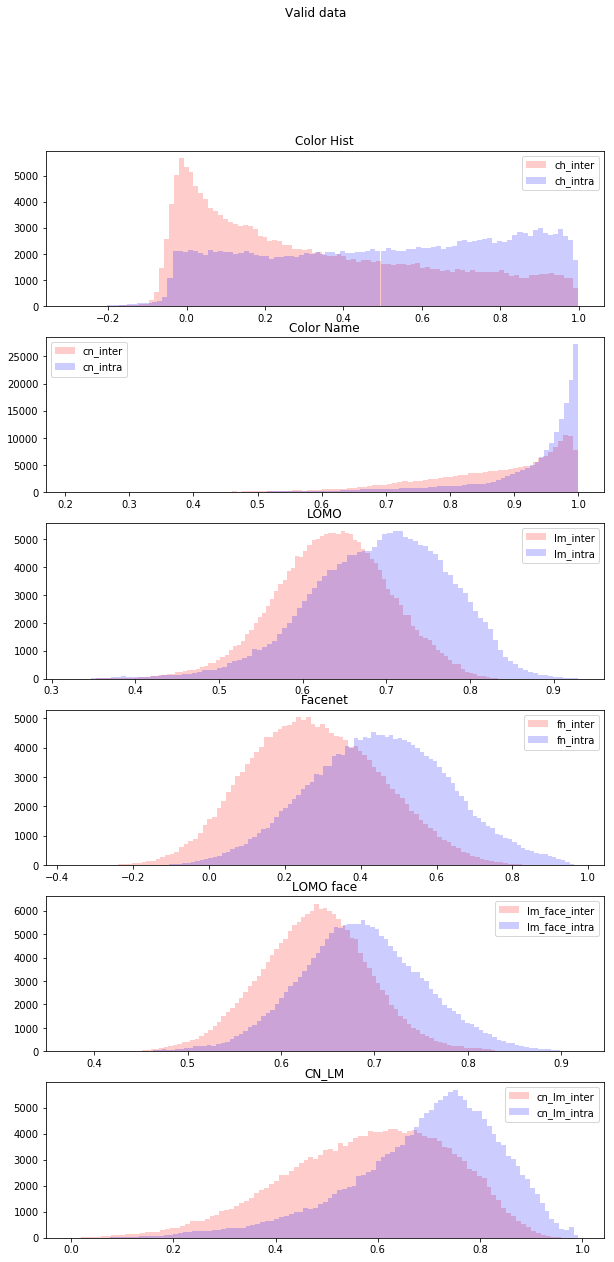

In [9]:
f, axarr = plt.subplots(6, 1, figsize=(10, 20), sharex=False)
f.suptitle('Valid data')
_ = axarr[0].hist(ch_inter, 100, color='r', alpha=0.2, label='ch_inter')
_ = axarr[0].hist(ch_intra, 100, color='b', alpha=0.2, label='ch_intra')
_ = axarr[0].legend()
_ = axarr[0].set_title('Color Hist')
_ = axarr[1].hist(cn_inter, 100, color='r', alpha=0.2, label='cn_inter')
_ = axarr[1].hist(cn_intra, 100, color='b', alpha=0.2, label='cn_intra')
_ = axarr[1].legend()
_ = axarr[1].set_title('Color Name')
_ = axarr[2].hist(lm_inter, 100, color='r', alpha=0.2, label='lm_inter')
_ = axarr[2].hist(lm_intra, 100, color='b', alpha=0.2, label='lm_intra')
_ = axarr[2].legend()
_ = axarr[2].set_title('LOMO')
_ = axarr[3].hist(fn_inter, 100, color='r', alpha=0.2, label='fn_inter')
_ = axarr[3].hist(fn_intra, 100, color='b', alpha=0.2, label='fn_intra')
_ = axarr[3].legend()
_ = axarr[3].set_title('Facenet')
_ = axarr[4].hist(lm_face_inter, 100, color='r', alpha=0.2, label='lm_face_inter')
_ = axarr[4].hist(lm_face_intra, 100, color='b', alpha=0.2, label='lm_face_intra')
_ = axarr[4].legend()
_ = axarr[4].set_title('LOMO face')
_ = axarr[5].hist(cn_lm_inter, 100, color='r', alpha=0.2, label='cn_lm_inter')
_ = axarr[5].hist(cn_lm_intra, 100, color='b', alpha=0.2, label='cn_lm_intra')
_ = axarr[5].legend()
_ = axarr[5].set_title('CN_LM')

# _ = axarr[0, 1].hist(val_neg_dists_L, 100, color='r', alpha=0.2, label='val_neg_dists_L')
# _ = axarr[0, 1].hist(val_pov_dists_L, 100, color='b', alpha=0.2, label='val_pov_dists_L')
# _ = axarr[0, 1].legend()
# _ = axarr[0, 1].set_title('learned cholesky L')
# _ = axarr[1, 1].hist(val_neg_dists_rL, 100, color='r', alpha=0.2, label='val_neg_dists_rL')
# _ = axarr[1, 1].hist(val_pov_dists_rL, 100, color='b', alpha=0.2, label='val_pov_dists_rL')
# _ = axarr[1, 1].legend()
# _ = axarr[1, 1].set_title('identity L')

percentile = 50
val_wrongs = dict()

# threshold = val_pov_dists_L[int(len(val_pov_dists_L)/(100/percentile))]
# val_wrongs['L'] = sum(val_neg_dists_L < threshold)/len(val_neg_dists_L)

# threshold = val_pov_dists_rL[int(len(val_pov_dists_rL)/(100/percentile))]
# val_wrongs['rL'] = sum(val_neg_dists_rL < threshold)/len(val_neg_dists_rL)

threshold = sorted(ch_intra)[int(len(ch_intra)/(100/percentile))]
# print(threshold)
val_wrongs['ch'] = sum(np.array(ch_inter) > threshold)/len(ch_inter)

threshold = sorted(cn_intra)[int(len(cn_intra)/(100/percentile))]
# print(threshold)
val_wrongs['cn'] = sum(np.array(cn_inter) > threshold)/len(cn_inter)

threshold = sorted(lm_intra)[int(len(lm_intra)/(100/percentile))]
# print(threshold)
val_wrongs['lm'] = sum(np.array(lm_inter) > threshold)/len(lm_inter)

threshold = sorted(fn_intra)[int(len(fn_intra)/(100/percentile))]
# print(threshold)
val_wrongs['fn'] = sum(np.array(fn_inter) > threshold)/len(fn_inter)

threshold = sorted(lm_face_intra)[int(len(lm_face_intra)/(100/percentile))]
# print(threshold)
val_wrongs['lm_face'] = sum(np.array(lm_face_inter) > threshold)/len(lm_face_inter)

threshold = sorted(cn_lm_intra)[int(len(cn_lm_intra)/(100/percentile))]
val_wrongs['cn_lm'] = sum(np.array(cn_lm_inter) > threshold)/len(cn_lm_inter)

print(val_wrongs)